In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

Question 1: Modeling volatility
Find data for historical prices for any publicly traded equity. To ensure the length of data, use daily data for at least 3 years. Fit the historical data to

1. Geometric Brownian motion
2. Any non-constant volatility model

Find market data for option prices for this stock. Use option prices to

3. Show volatility smile
4. Construct term structure of volatility
5. Plot the volatility surface, as a function of time to maturity and moneyness.

In [9]:
spy = yf.Ticker('SPY')
df = spy.history(period="5y")
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-09-28 00:00:00-04:00,425.480011,430.250000,424.869995,428.519989,92258300,0.0,0.0,0.0
2023-09-29 00:00:00-04:00,431.670013,431.850006,425.910004,427.480011,115078500,0.0,0.0,0.0
2023-10-02 00:00:00-04:00,426.619995,428.600006,424.459991,427.309998,83798600,0.0,0.0,0.0
2023-10-03 00:00:00-04:00,425.059998,427.369995,420.179993,421.589996,103760600,0.0,0.0,0.0
2023-10-04 00:00:00-04:00,422.070007,425.429993,420.559998,424.660004,87372400,0.0,0.0,0.0


1. Geometric Brownian motion

$\frac{lnS(t_i)-lnS(t_{i-1})}{\sqrt{\Delta t}}= (\mu-\frac{1}{2}\sigma^2)\sqrt{\Delta t}+\sigma\frac{B(t_i)-B(t_{i-1})}{\sqrt{\Delta t}}$

In [16]:
y = np.log(df.Close/df.Close.shift(1))

In [30]:
#historic volatility
hv = y.std()*np.sqrt(252)
hv

0.21595302226880575

$ s^2 = \frac{1}{N-1} (\sum_{i=1}^{N}y_i^2-N\overline{y}^2)  $

In [31]:
np.sqrt(((y**2).sum()-len(y)*y.mean()**2)/(len(y)-1)*252)

0.21586697084683454

2. Any non-constant volatility model

Text(0, 0.5, 'volatility')

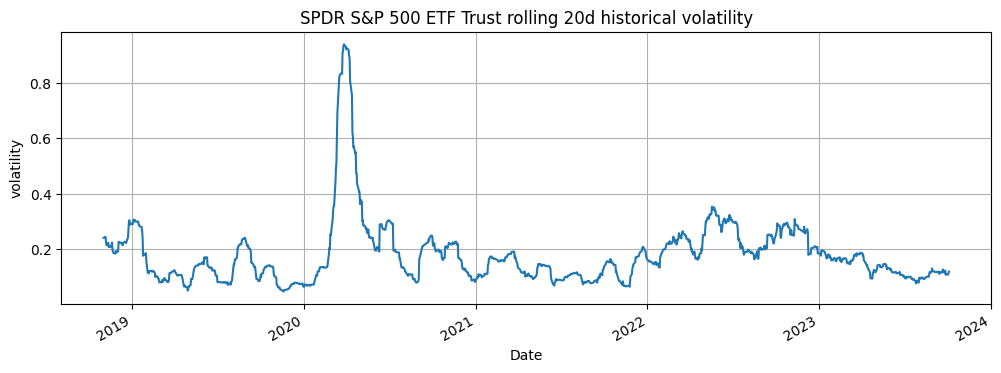

In [48]:
# rolling 20d historic volatility
ax = (y.rolling(20).std()*np.sqrt(252)).plot(figsize=(12,4),grid=True,title=spy.info['longName']+' rolling 20d historical volatility')
ax.set_ylabel("volatility")

In [80]:
#EWMA volatility model
y**2*np.sqrt(252)


Date
2018-10-05 00:00:00-04:00         NaN
2018-10-08 00:00:00-04:00    0.000000
2018-10-09 00:00:00-04:00    0.000034
2018-10-10 00:00:00-04:00    0.016434
2018-10-11 00:00:00-04:00    0.007875
                               ...   
2023-09-28 00:00:00-04:00    0.000530
2023-09-29 00:00:00-04:00    0.000094
2023-10-02 00:00:00-04:00    0.000003
2023-10-03 00:00:00-04:00    0.002883
2023-10-04 00:00:00-04:00    0.000836
Name: Close, Length: 1257, dtype: float64

In [81]:
vol0 = y[:21].std()
decay = 0.01
ewma_vol = pd.Series(index=y.index)
for i in range(22, len(y.index)):
    ewma_vol.iloc[i] = (1-decay)*y.iloc[i-1]**2 + decay*vol0
    vol0 =  ewma_vol.iloc[i]
ewma_vol = ewma_vol*np.sqrt(252)


<Axes: xlabel='Date'>

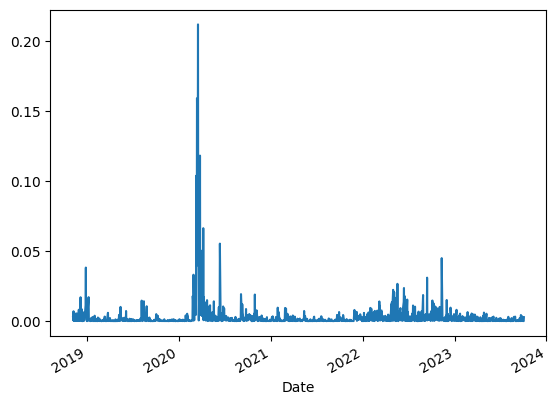

In [82]:
ewma_vol.plot()

In [83]:
# GARCH Model
